In [6]:
import pandas as pd
import requests

In [1]:
# Gather Data

In [144]:
url= 'https://www.worldometers.info/coronavirus/'
  
covid16_table = pd.read_html(url)
covid16_table = tables[0].fillna('0')
covid16_table.rename(columns = {'Country,Other':'Statistic', 'Serious,Critical':'Critical'},inplace = True) 
covid16_table.NewCases = covid16_table.NewCases.apply(lambda x: x.replace('+',''))
covid16_table

,Statistic,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,TotalRecovered,Critical
0,China,80652,100,3070,28,22061,55521,5489
1,S. Korea,7041,448,48,5,6875,118,36
2,Iran,5823,"1,076",145,21,4009,1669,0
3,Italy,4636,0,197,0,3916,523,462
4,Germany,717,47,0,0,699,18,9
...,...,...,...,...,...,...,...,...
95,Malta,1,1,0,0,1,0,0
96,Peru,1,0,0,0,1,0,0
97,Serbia,1,0,0,0,1,0,0
98,Togo,1,0,0,0,1,0,0


In [145]:
# Clean Transpose covid16_table_transposed = covid16_table.transpose()
covid16_table_transposed.columns = covid16_table_transposed.iloc[0]
covid16_table_transposed = covid16_table_transposed.iloc[1:]
covid16_table_transposed = covid16_table_transposed[covid16_table_transposed.columns].apply(pd.to_numeric, errors='coerce')
covid16_table_transposed = covid16_table_transposed.fillna('0')
covid16_table_transposed

Statistic,China,S. Korea,Iran,Italy,Germany,France,Diamond Princess,Spain,Japan,USA,...,Colombia,Costa Rica,Gibraltar,Vatican City,Liechtenstein,Malta,Peru,Serbia,Togo,Total:
TotalCases,80652.0,7041.0,5823,4636.0,717.0,716.0,696.0,500.0,435.0,335.0,...,1,1,1.0,1,1,1,1,1,1,104144.0
NewCases,100.0,448.0,0,0.0,47.0,63.0,0.0,99.0,15.0,16.0,...,0,0,0.0,0,0,1,0,0,0,2199.0
TotalDeaths,3070.0,48.0,145,197.0,0.0,11.0,6.0,10.0,6.0,17.0,...,0,0,0.0,0,0,0,0,0,0,3526.0
NewDeaths,28.0,5.0,21,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0,0,0.0,0,0,0,0,0,0,60.0
ActiveCases,22061.0,6875.0,4009,3916.0,699.0,693.0,445.0,460.0,353.0,303.0,...,1,1,1.0,1,1,1,1,1,1,42059.0
TotalRecovered,55521.0,118.0,1669,523.0,18.0,12.0,245.0,30.0,76.0,15.0,...,0,0,0.0,0,0,0,0,0,0,58559.0
Critical,5489.0,36.0,0,462.0,9.0,23.0,32.0,9.0,28.0,8.0,...,0,0,1.0,0,0,0,0,0,0,6130.0


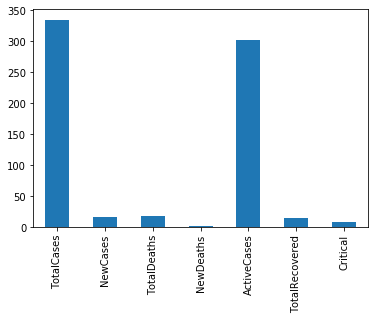

In [146]:

covid16_table_transposed['USA'].plot.bar()